# Data Visualization For Ubaar Orders

In [ ]:
#@title Setup Environment
import pandas as pd
import io
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

from google.colab import drive
from tqdm.notebook import trange, tqdm
from IPython.display import clear_output

# Loading the Dataset
Now we will load orders dataset from personal google drive. So we must mount the drive and load the dataset from appropriate path.

In [ ]:
#@title Connect to Google Drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/Datasets/Ubaar/orders_data.csv'
orders_data = pd.read_csv(file_path)
print("Orders Dataset Shape: ", orders_data.shape)

Orders Dataset Shape:  (44052, 30)


#Getting Some Insights from Our Data
Since a good visualization helps a lot in making sense of our data, we will draw some charts to get better insight about the Ubaar orders dataset. At this time we want to get some basci info from the dataset and become more familiar with it. First we will see the **top ten rows** of the dataset and then get some statistical information about Ubaar orders.

In [ ]:
orders_data.head(10)

Load Type Source City Destination City Source State  \
0                  بار صنعتی         یزد         بندرعباس          یزد   
1                  بار صنعتی       قزوین            رودسر        قزوین   
2                  بار صنعتی       تهران            همدان        تهران   
3                  بار صنعتی         آمل            گرگان     مازندران   
4             گلدان پلاستیکی      هشتگرد           اردبیل        البرز   
5                  بار صنعتی      کازرون            تهران         فارس   
6                  بار صنعتی     خوانسار             دیلم       اصفهان   
7                  بار صنعتی      اصفهان       گنبد کاووس       اصفهان   
8  انواع رنگ ومواد پاك کننده     اشتهارد             مشهد        البرز   
9     انواع سموم وکودشیمیایی       تهران             اراک        تهران   

  Destination State       Source Region Destination Region Who Added Role  \
0           هرمزگان                 یزد           بندرعباس      anonymous   
1             گیلان               قزوین             چابکسر      anonymous   
2             همدان               تهران              همدان      anonymous   
3            گلستان                 آمل              گرگان      anonymous   
4            اردبیل            پل کردان             اردبیل       baarbari   
5             تهران           قیروکازین              تهران      anonymous   
6             بوشهر             خوانسار          بندر دیلم      anonymous   
7            گلستان              اصفهان         گنبد کاووس      anonymous   
8       خراسان رضوی  شهرک صنعتی اشتهارد               مشهد       baarbari   
9             مرکزی               تهران               اراک           user   

   Driver Income  Weight  ...  Destination Lat  Destination Lng  \
0            0.0    24.0  ...        27.183222        56.266646   
1            0.0     5.0  ...        36.980067        50.531772   
2            0.0     2.0  ...        34.798857        48.515023   
3            0.0    15.0  ...        36.845643        54.439336   
4            0.0     2.0  ...        38.256645        48.317509   
5            0.0     5.0  ...        35.688905        51.388435   
6            0.0    10.0  ...        30.058981        50.167812   
7            0.0     5.0  ...        37.238322        55.167322   
8      1100000.0     4.0  ...        36.272622        59.600624   
9       744000.0    15.0  ...        34.095355        49.701349   

  Dispatch Time Delta Pickup Date Time Delta Order Channel  Packaging Type  \
0           23.928889                    NaN           NaN       hichkodam   
1           23.970278                    NaN           NaN       hichkodam   
2           23.962778                    NaN           NaN       hichkodam   
3           23.974722                    NaN           NaN       hichkodam   
4           16.749444              68.358889           web          karton   
5           23.968056                    NaN           NaN       hichkodam   
6           23.978889                    NaN           NaN       hichkodam   
7           23.943889                    NaN           NaN       hichkodam   
8            0.403056                    NaN       android          falleh   
9           39.288611                    NaN       android     kiseh_gooni   

                  Creation Datetime Unload Option  Has Comments   Load Status  
0  2019-11-05 06:46:15.847289+00:00           NaN             0  reject_price  
1  2019-11-05 20:01:46.763769+00:00           NaN             0  reject_price  
2  2019-11-06 09:13:13.686217+00:00           NaN             0  reject_price  
3  2019-10-31 09:52:30.930302+00:00           NaN             0  reject_price  
4  2019-11-20 13:45:01.859383+00:00           day             0     delivered  
5  2019-10-31 04:34:54.206605+00:00           NaN             0  reject_price  
6  2019-11-02 19:46:15.870573+00:00           NaN             0  reject_price  
7  2019-11-03 05:16:21.270880+00:00           NaN             0  reject_price  
8  2019-10-15 07:35:48.686186+00:00    

In [ ]:
orders_data.describe()

Driver Income        Weight      Distance      Duration  \
count   4.405200e+04  44052.000000  44052.000000  44052.000000   
mean    3.677479e+11      7.860764    486.471045      5.681138   
std     7.718487e+13      7.912958    440.643799      4.893344   
min     0.000000e+00      0.020000      0.000000      0.000000   
25%     0.000000e+00      2.000000     50.000000      1.000000   
50%     1.800000e+05      4.000000    442.701000      4.861806   
75%     1.000000e+06     11.000000    817.966000      9.536319   
max     1.620000e+16     25.000000   2622.035000     28.618889   

       Transport Cost    Source Lat    Source Lng  Destination Lat  \
count    4.405200e+04  44052.000000  44052.000000     44052.000000   
mean     3.677479e+11     34.751266     51.545719        34.018325   
std      7.718487e+13      2.201000      2.750519         3.039853   
min      0.000000e+00     24.494214     28.953026        24.494214   
25%      0.000000e+00     33.640419     50.681933        32.198349   
50%      1.850000e+05     35.688905     51.388435        35.490586   
75%      1.000000e+06     35.837669     51.667983        36.271035   
max      1.620000e+16     41.052112     69.870829        41.052112   

       Destination Lng  Dispatch Time Delta  Pickup Date Time Delta  \
count     44052.000000         44052.000000             2808.000000   
mean         51.926935            28.755725               27.093312   
std           3.837871            59.757645               22.847216   
min          28.953026            -4.676944                0.006667   
25%          49.587414             3.048333               17.518611   
50%          51.388435            18.008333               21.120972   
75%          53.031317            24.240069               29.626528   
max          69.870829          2204.550833              481.925000   

       Has Comments  
count  44052.000000  
mean       0.362458  
std        0.480716  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000

## Bar Charts and Histograms
As Ubaar suppots all over the country, we want to compare which cities have more importance in out bussines.

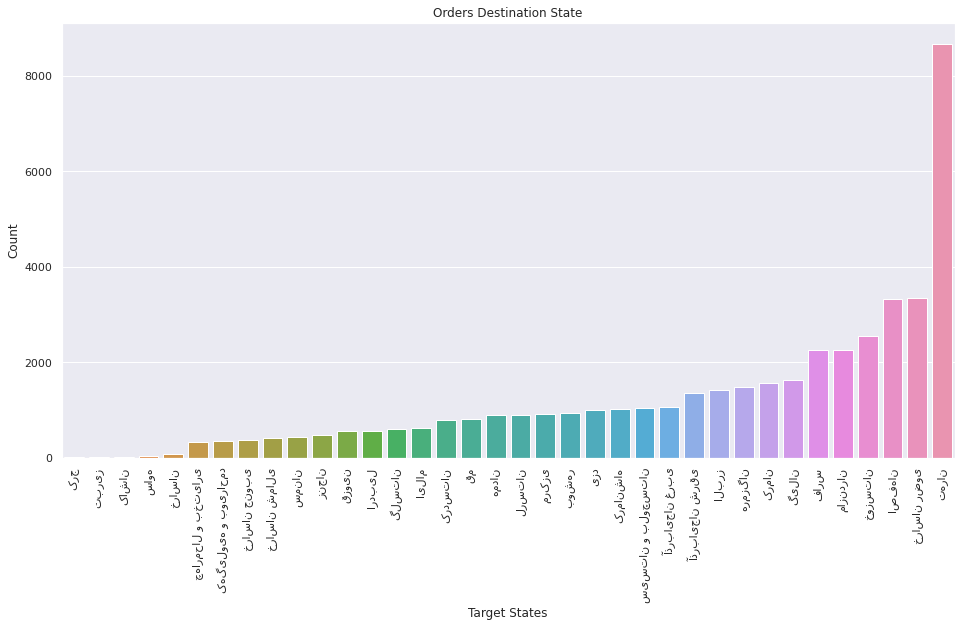

In [ ]:
sorted_ords = orders_data.groupby(by='Destination State')['Creation Datetime'].count().sort_values()
states = sorted_ords.index

plt.figure(figsize=(16,8))
sns.barplot(x=states, y=sorted_ords)
plt.title('Orders Destination State')
plt.ylabel("Count")
plt.xlabel("Target States")
plt.xticks(rotation=90)
plt.show()

There is a significant gap between Tehran and other cites so we can use **logarithm** on the y axis. Now we can compare between cities with a few orders destination.

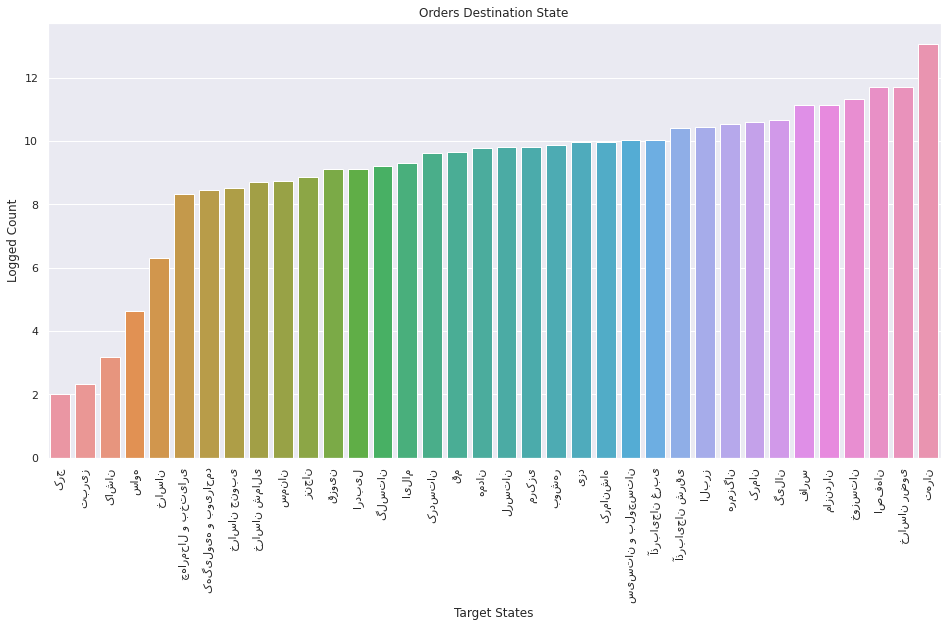

In [ ]:
plt.figure(figsize=(16,8))
sns.barplot(x=states, y=np.log2(sorted_ords))
plt.title('Orders Destination State')
plt.ylabel("Logged Count")
plt.xlabel("Target States")
plt.xticks(rotation=90)
plt.show()

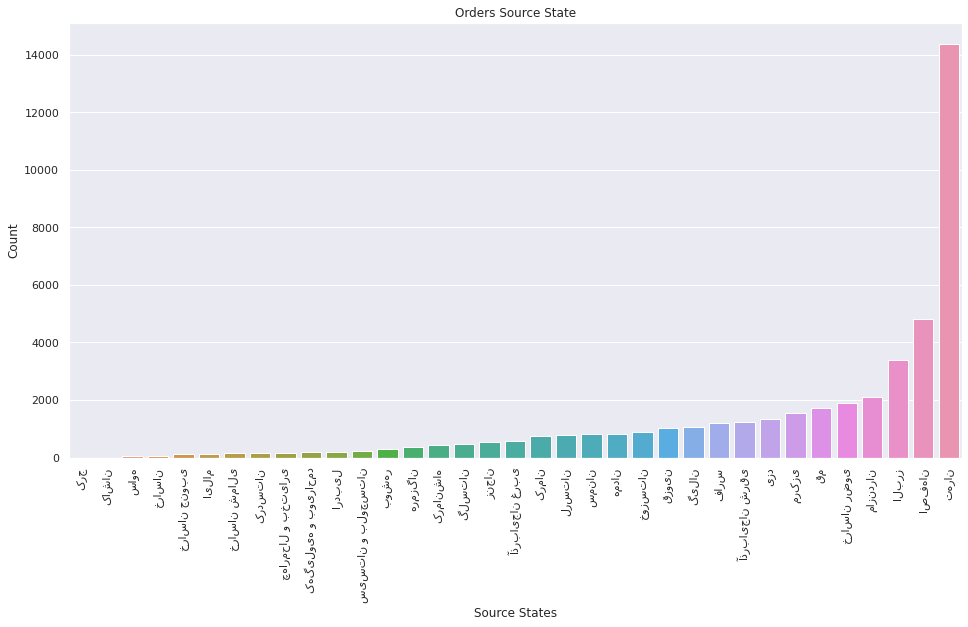

In [ ]:
sorted_ords = orders_data.groupby(by='Source State')['Creation Datetime'].count().sort_values()
states = sorted_ords.index

plt.figure(figsize=(16,8))
sns.barplot(x=states, y=sorted_ords)
plt.title('Orders Source State')
plt.ylabel("Count")
plt.xlabel("Source States")
plt.xticks(rotation=90)
plt.show()

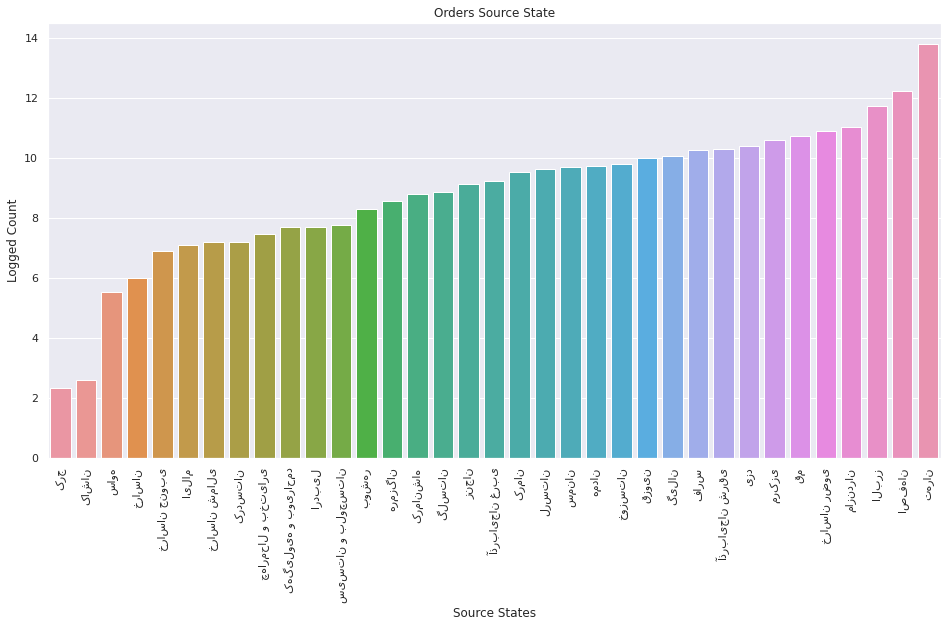

In [ ]:
plt.figure(figsize=(16,8))
sns.barplot(x=states, y=np.log2(sorted_ords))
plt.title('Orders Source State')
plt.ylabel("Logged Count")
plt.xlabel("Source States")
plt.xticks(rotation=90)
plt.show()

In [ ]:
orders_data.columns

Index(['Load Type', 'Source City', 'Destination City', 'Source State',
       'Destination State', 'Source Region', 'Destination Region',
       'Who Added Role', 'Driver Income', 'Weight', 'Distance', 'Duration',
       'Vehicle Type', 'Vehicle Options', 'Baarnameh Type', 'Transport Cost',
       'Dispatch Date', 'Dipatch Time', 'Source Lat', 'Source Lng',
       'Destination Lat', 'Destination Lng', 'Dispatch Time Delta',
       'Pickup Date Time Delta', 'Order Channel', 'Packaging Type',
       'Creation Datetime', 'Unload Option', 'Has Comments', 'Load Status'],
      dtype='object')

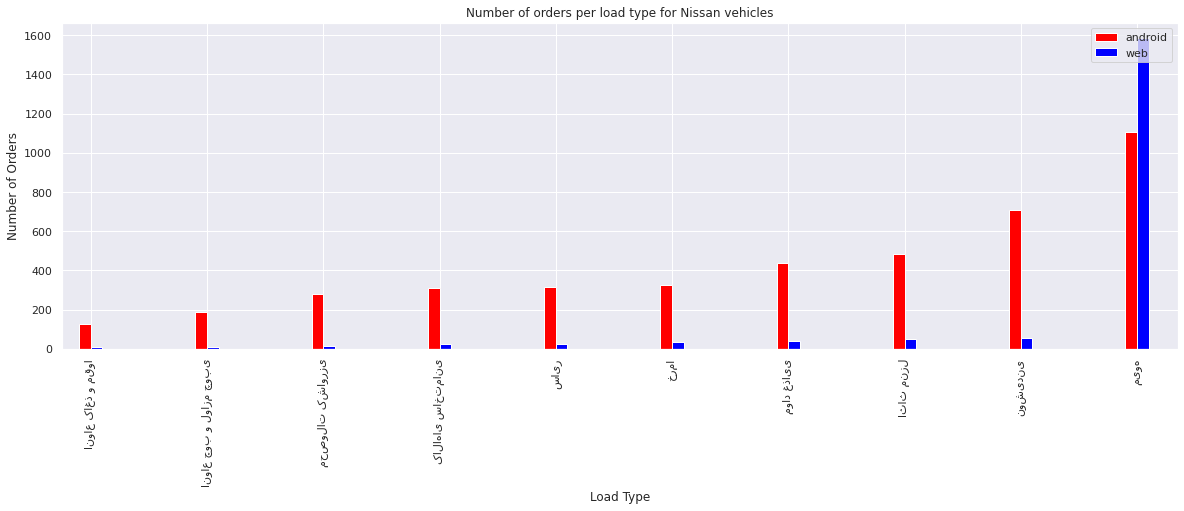

In [ ]:
fig = plt.figure(figsize=(20, 6)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes

width = 0.1

load_types = orders_data[orders_data["Vehicle Type"] == "nissan"]['Load Type'].value_counts()[:10].index
colors = ["red", "orange", "blue", "green", "black"]


lns1 = orders_data[(orders_data["Vehicle Type"] == "nissan") & (orders_data['Order Channel'] == 'android')].groupby(['Load Type']).size().sort_values()[-10:].plot(kind='bar', color='red', width=width, position=1,label="android")
lns1 = orders_data[(orders_data["Vehicle Type"] == "nissan") & (orders_data['Order Channel'] == 'web')].groupby(['Load Type']).size().sort_values()[-10:].plot(kind='bar', color='blue', width=width, position=0,label="web")



ax.set_ylabel('Number of Orders')

plt.legend(loc='upper right')
ax.set_title('Number of orders per load type for Nissan vehicles')
plt.show()


In [ ]:
treili_df.describe()

Driver Income       Weight     Distance     Duration  Transport Cost  \
count   9.166000e+03  9166.000000  9166.000000  9166.000000    9.166000e+03   
mean    1.767403e-03    19.849334   605.386612     7.009135    1.767403e+12   
std     1.692096e-01     6.968381   489.836777     5.476917    1.692096e+14   
min     0.000000e+00     0.400000     0.000000     0.000000    0.000000e+00   
25%     0.000000e+00    20.000000   103.256000     1.523889    0.000000e+00   
50%     1.050000e-09    23.000000   612.861000     7.378889    1.080000e+06   
75%     2.720000e-09    24.000000   939.932000    10.566111    2.725000e+06   
max     1.620000e+01    25.000000  2622.035000    28.618889    1.620000e+16   

        Source Lat   Source Lng  Destination Lat  Destination Lng  \
count  9166.000000  9166.000000      9166.000000      9166.000000   
mean     34.480098    51.577275        33.305141        52.263519   
std       2.437860     3.162548         3.446404         4.626978   
min      25.296878    44.259450        24.494214        43.938923   
25%      32.654627    50.029743        30.505248        48.674809   
50%      35.338090    51.388435        34.188318        51.426487   
75%      36.128863    52.583698        36.174465        56.002705   
max      39.599604    61.490248        39.599604        63.262839   

       Dispatch Time Delta  Pickup Date Time Delta  Has Comments  
count          9166.000000               52.000000   9166.000000  
mean             27.937282               43.654423      0.423849  
std              63.860006               29.142706      0.494194  
min              -2.005278                8.002500      0.000000  
25%               3.640625               23.690278      0.000000  
50%              17.560417               36.640556      0.000000  
75%              24.168611               51.837639      1.000000  
max            2204.550833              136.745000      1.000000

Distribution of Drivers Incom for most used vehicle type:

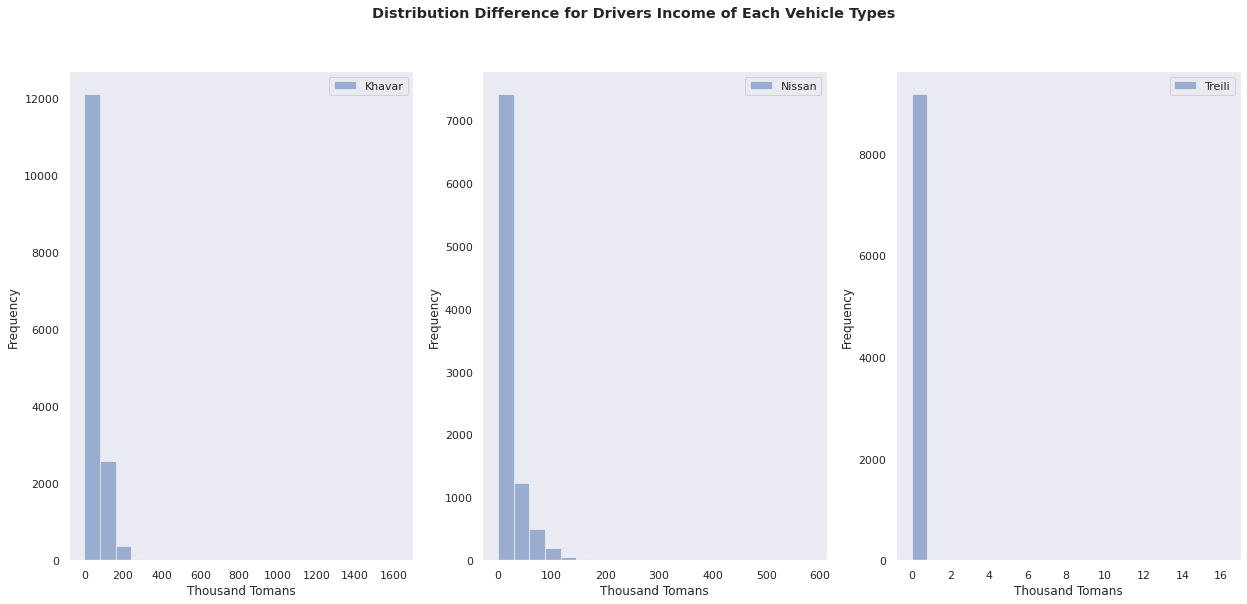

In [ ]:
khavar_df = orders_data[orders_data['Vehicle Type']=='khavar']
nissan_df = orders_data[orders_data['Vehicle Type']=='nissan']
treili_df = orders_data[orders_data['Vehicle Type']=='treili']

treili_df['Driver Income'] = treili_df['Driver Income']/10**15
nissan_df['Driver Income'] = nissan_df['Driver Income']/10000
khavar_df['Driver Income'] = khavar_df['Driver Income']/10000

fig , axs = plt.subplots(1, 3, figsize=(21,9))
fig.suptitle("Distribution Difference for Drivers Income of Each Vehicle Types ", fontweight="heavy")
axs[0].hist(x=khavar_df['Driver Income'].to_numpy(), bins=20, alpha=0.5, label='Khavar', stacked=True)
axs[1].hist(x=nissan_df['Driver Income'].to_numpy(), bins=20, alpha=0.5, label='Nissan', stacked=True)
axs[2].hist(x=treili_df['Driver Income'].to_numpy(), bins=20, alpha=0.5, label='Treili', stacked=True)
axs[0].set(xlabel="Thousand Tomans")
axs[1].set(xlabel="Thousand Tomans")
axs[2].set(xlabel="Thousand Tomans")

for ax in axs.flat:
  ax.grid()
  ax.legend(loc='upper right')
  ax.set(ylabel="Frequency")

clear_output()

plt.show()

##Scatter Plot and Bubble Chart



Text(0.5, 1.0, 'Orders Weight and Duration Relation')

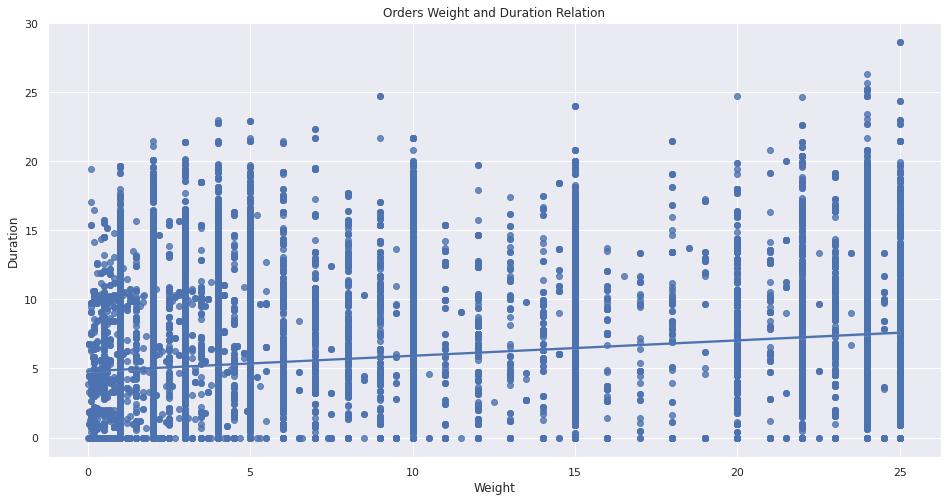

In [ ]:
plt.figure(figsize=(16,8))
sns.regplot(x=orders_data['Weight'], y=orders_data['Duration'])
plt.title('Orders Weight and Duration Relation')

Text(0.5, 1.0, 'Orders Weight and Distance Relation')

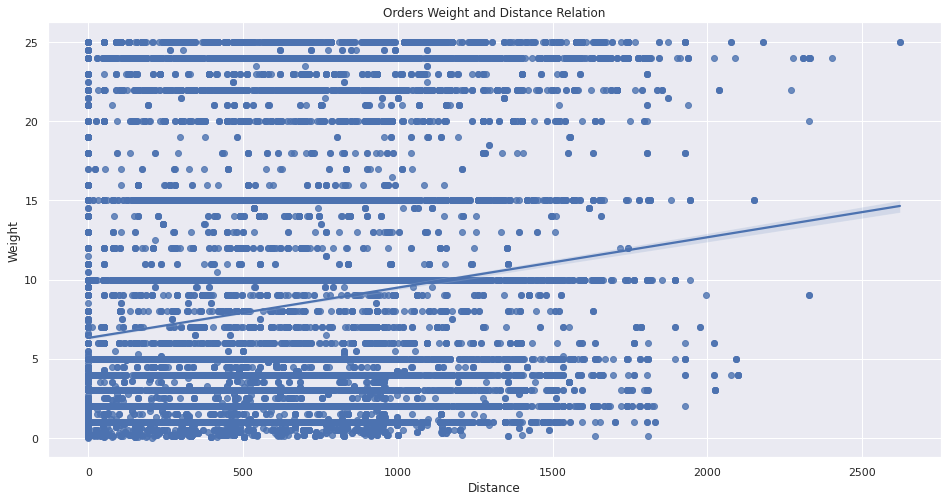

In [ ]:
plt.figure(figsize=(16,8))
sns.regplot(x=orders_data['Distance'], y=orders_data['Weight'])
plt.title('Orders Weight and Distance Relation')

Text(0.5, 1.0, 'Orders Duration and Distance Relation')

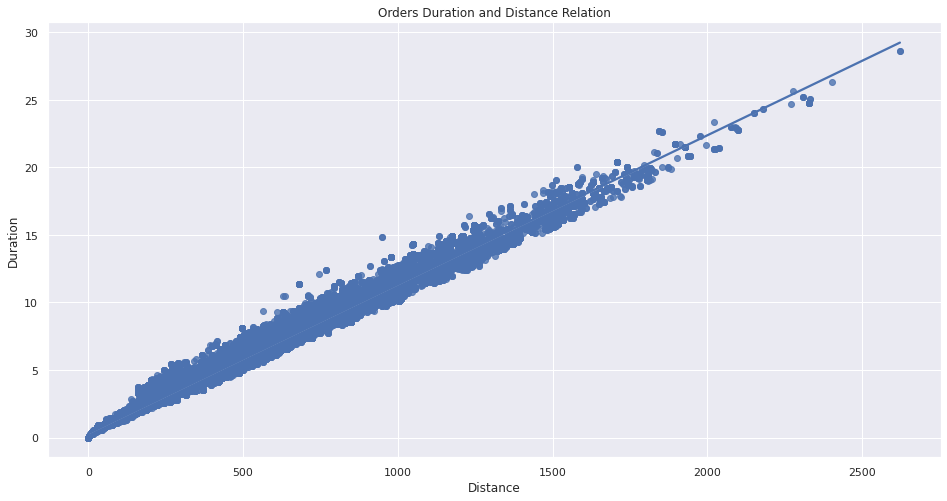

In [ ]:
plt.figure(figsize=(16,8))
sns.regplot(x=orders_data['Distance'], y=orders_data['Duration'])
plt.title('Orders Duration and Distance Relation')

Text(0.5, 1.0, 'Orders Duration and Weight Relation for Vehicle Types')

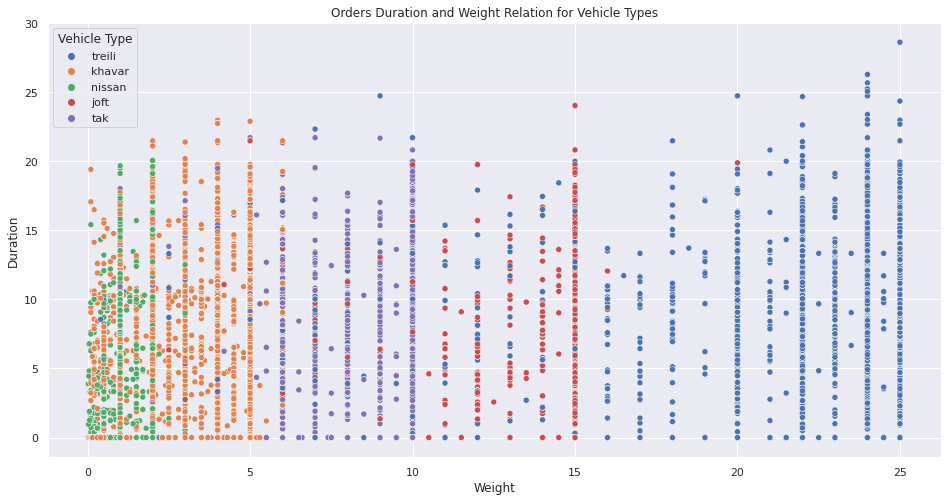

In [ ]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=orders_data['Weight'], y=orders_data['Duration'], hue=orders_data['Vehicle Type'])
plt.title('Orders Duration and Weight Relation for Vehicle Types')

Text(0.5, 1.0, 'tak')

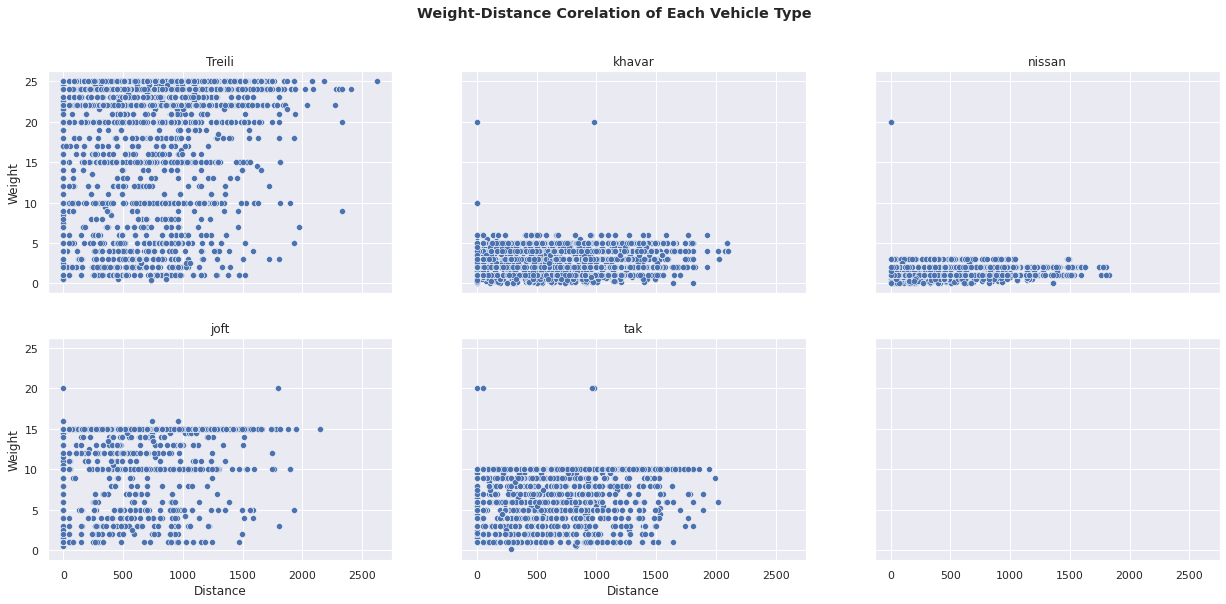

In [ ]:
fig , axs = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(21,9))
fig.suptitle("Weight-Distance Corelation of Each Vehicle Type", fontweight="heavy")
sns.scatterplot(ax=axs[0,0], x=orders_data[orders_data['Vehicle Type']=='treili']["Distance"], y=orders_data[orders_data['Vehicle Type']=='treili']["Weight"])
sns.scatterplot(ax=axs[0,1], x=orders_data[orders_data['Vehicle Type']=='khavar']["Distance"], y=orders_data[orders_data['Vehicle Type']=='khavar']["Weight"])
sns.scatterplot(ax=axs[0,2], x=orders_data[orders_data['Vehicle Type']=='nissan']["Distance"], y=orders_data[orders_data['Vehicle Type']=='nissan']["Weight"])
sns.scatterplot(ax=axs[1,0], x=orders_data[orders_data['Vehicle Type']=='joft']["Distance"], y=orders_data[orders_data['Vehicle Type']=='joft']["Weight"])
sns.scatterplot(ax=axs[1,1], x=orders_data[orders_data['Vehicle Type']=='tak']["Distance"], y=orders_data[orders_data['Vehicle Type']=='tak']["Weight"])
axs[0, 0].set_title("Treili")
axs[0, 1].set_title("khavar")
axs[0, 2].set_title("nissan")
axs[1, 0].set_title("joft")
axs[1, 1].set_title("tak")

Text(0.5, 1.0, 'tak')

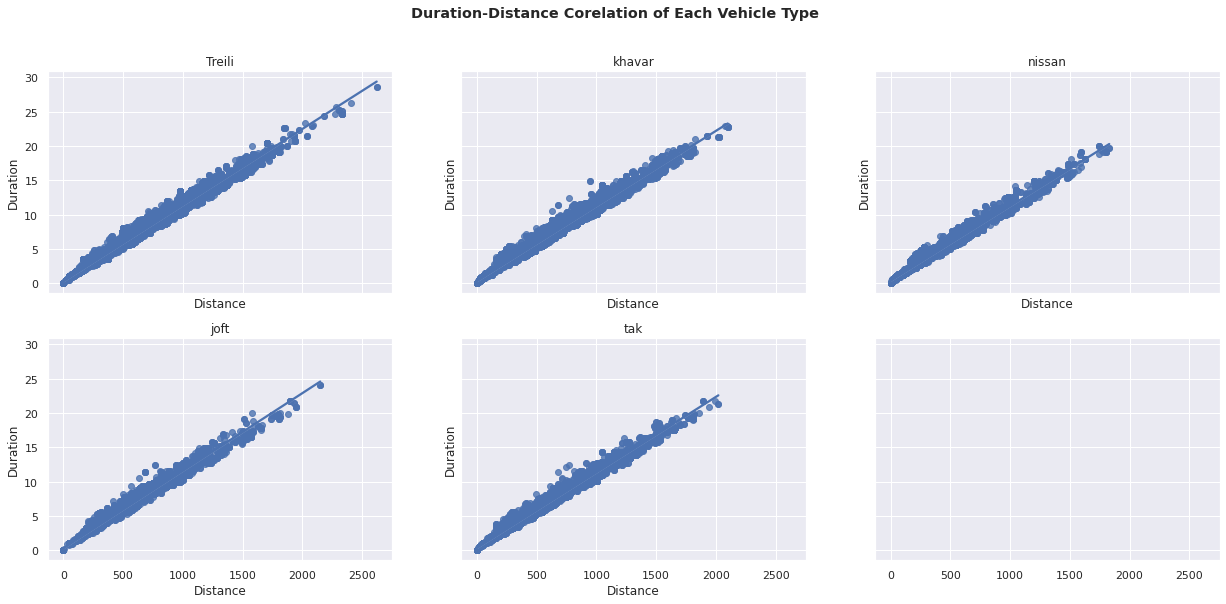

In [ ]:
fig , axs = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(21,9))
fig.suptitle("Duration-Distance Corelation of Each Vehicle Type", fontweight="heavy")
sns.regplot(ax=axs[0,0], x=orders_data[orders_data['Vehicle Type']=='treili']["Distance"], y=orders_data[orders_data['Vehicle Type']=='treili']["Duration"])
sns.regplot(ax=axs[0,1], x=orders_data[orders_data['Vehicle Type']=='khavar']["Distance"], y=orders_data[orders_data['Vehicle Type']=='khavar']["Duration"])
sns.regplot(ax=axs[0,2], x=orders_data[orders_data['Vehicle Type']=='nissan']["Distance"], y=orders_data[orders_data['Vehicle Type']=='nissan']["Duration"])
sns.regplot(ax=axs[1,0], x=orders_data[orders_data['Vehicle Type']=='joft']["Distance"], y=orders_data[orders_data['Vehicle Type']=='joft']["Duration"])
sns.regplot(ax=axs[1,1], x=orders_data[orders_data['Vehicle Type']=='tak']["Distance"], y=orders_data[orders_data['Vehicle Type']=='tak']["Duration"])
axs[0, 0].set_title("Treili")
axs[0, 1].set_title("khavar")
axs[0, 2].set_title("nissan")
axs[1, 0].set_title("joft")
axs[1, 1].set_title("tak")

## Pie Chart and Box Chart

In [ ]:
orders_data['Packaging Type'].value_counts()

hichkodam      15319
karton         11464
falleh          6341
kiseh_gooni     5647
pallet          3443
roll            1042
bandil           796
Name: Packaging Type, dtype: int64

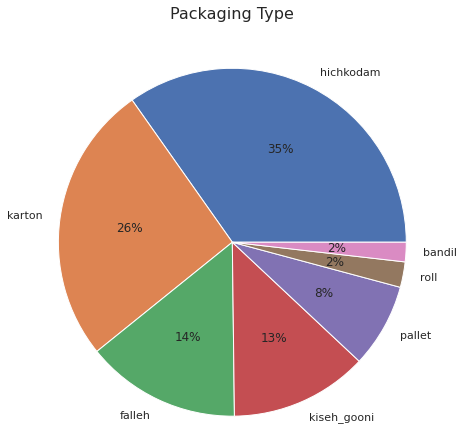

In [ ]:
orders_data['Packaging Type'].value_counts().plot.pie(autopct='%1.0f%%',radius=2,ylabel='')
plt.title('Packaging Type', y=1.5,fontsize=16)
plt.show()

Know Let's see how is the drivers income.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


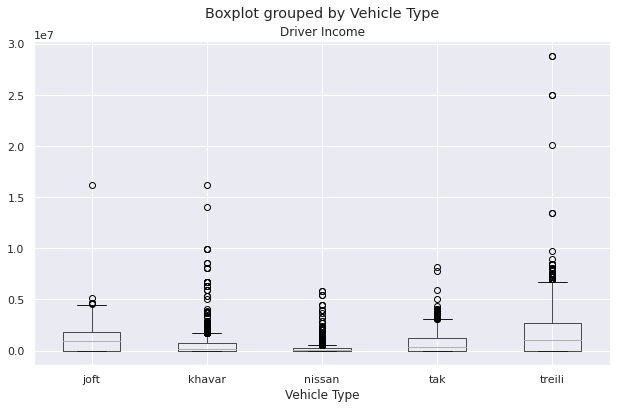

In [ ]:
orders_data2 = orders_data[orders_data['Driver Income'] < 2e10]  # Remove outlier
orders_data2.boxplot('Driver Income', by='Vehicle Type',figsize=(10, 6))

## Line Charts

## Using Bokeh

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
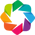

In [ ]:
#@title Setup Bokeh
# Setup "Bokeh" environment
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
import holoviews as hv
hv.extension('bokeh')
output_notebook()

plot = figure(x_axis_label=("Weigth"), y_axis_label=("Cost"),
              title="Cumulative Cost for Each order Weigth",
              plot_width=800, plot_height=400)

without_outlier = orders_data.groupby(by=['Weight'])['Transport Cost'].sum()
o_id =without_outlier.idxmax()
without_outlier[o_id] = without_outlier[o_id]/10**10
orders_data.sort_values(by=['Weight'], ascending=True)
orders_data.groupby(by=['Weight'])['Transport Cost'].sum()
plot.scatter(x=list(orders_data['Weight'].unique()), y=list(without_outlier), color='green', line_width=4)

show(plot)